In [3]:
#Loading the tiktok class and few libraries for data crunching and visualization
from tiktok_interface import Tiktok_I_ED
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress

In [15]:
#Initialize the TikTok fetcher:

##Replace this with your token! 
##Get one for free at https://www.ensembledata.com/register
TOKEN = ""

tt = Tiktok_I_ED(token_ED_API=TOKEN)

In [9]:
#Fetch the latest posts of a user (given its username). 
# We set a high depth parameter so to get a good history overview.

username = "charlidamelio"
res, success = tt.get_user_posts(username=username, depth=10, oldest_createtime=1548151857)

if success:
    print("fetched the last",len(res),"posts")
else:
    print("Something went wrong with the request: ", res.text)

fetched the last 98 posts


In [10]:
#Get the views counts from all the videos (in chronological order):
play_count = [video["statistics"]["play_count"] for video in res]
print(play_count)

[7191911, 3751877, 19265194, 10222634, 6712622, 17340044, 9194812, 17243076, 13258949, 12779981, 17048839, 16175538, 9992703, 9231725, 7949067, 29924771, 14349526, 21762979, 8254293, 7361924, 10125084, 33275734, 19892495, 13214714, 22270236, 17391740, 13936441, 12153624, 11823123, 7981496, 13890974, 11817441, 8061767, 14219055, 8331986, 12232970, 9982312, 7189622, 8971618, 8931692, 13363906, 11920111, 34843449, 17544501, 11864703, 14601780, 24075425, 17441437, 11765884, 21093287, 14702578, 9518481, 33109560, 14298488, 11556436, 10756109, 17805966, 16064955, 26867881, 13154392, 10397591, 47921275, 13896527, 13715641, 11336395, 12877722, 12205486, 19090516, 12742812, 29906572, 16088452, 10798395, 62089647, 21771855, 52711305, 18673122, 27486502, 15350081, 13162732, 10838578, 10572067, 15459096, 12213469, 15740615, 61824654, 16856796, 11995512, 9538880, 19002224, 11545029, 36199435, 15944372, 31969783, 17351425, 11694026, 78118170, 15479355, 19628264]


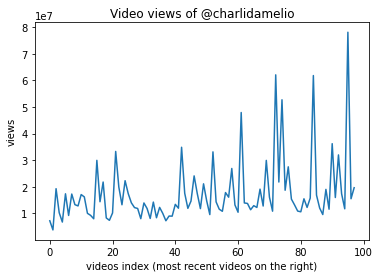

In [11]:
#Plotting it with matplotlib:

plt.plot(play_count)
 
plt.xlabel('videos index (most recent videos on the right)')
plt.ylabel('views')
 
plt.title('Video views of @'+username)
 
# function to show the plot
plt.show()

Two interesting things to notice:
* The general trend is an (overall stable) increase of views
* But on a micro level, there is a lot of variance: some videos get viral and explode while other are probaly just watched by the user's followers

How about engagement? Does that also increase? <br>
We calculate the engagement as the sum of likes, comments, shares and downloads, divided by the views:

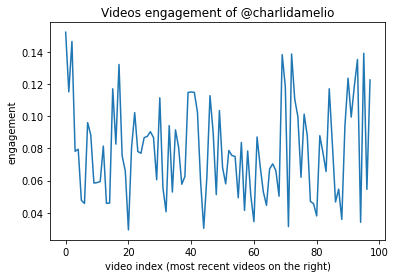

In [12]:
#Getting these information is as straightforward as before:
comment_count = [video["statistics"]["comment_count"] for video in res]
share_count = [video["statistics"]["share_count"] for video in res]
download_count = [video["statistics"]["download_count"] for video in res]
likes_count = [video["statistics"]["digg_count"] for video in res]
engagement = [(c+s+d+l)/v for c,s,d,l,v in zip(comment_count,share_count,download_count,likes_count, play_count)]

#Plotting it:

plt.plot(engagement)
 
plt.xlabel('video index (most recent videos on the right)')
plt.ylabel('engagement')
 
plt.title('Videos engagement of @'+username)
 
# function to show the plot
plt.show()

The engagement actually decreases, from 0.2 to 0.1. Meaning roughly 20-10% of viewers have interacted with the video.<br>
However, if you have a broader outlook on these metrics across TikTok you will see it is actually a common phenomenon at this level of popularity. <br>In fact, 10% engagement is higher than average. 
<br>
<br>
<br>
The great thing about the fetched data is that it has all the (public) information avaiable. <br>
For example, let's say we want to delve a little bit more into the user's post to understand its posting strategy. Does the user uses a lot of hashtag? And does it get more views when it does ?

Out of 98 videos, there are 22 with hashtag


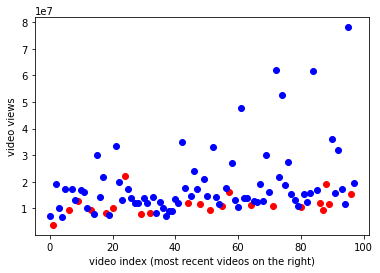

In [13]:
#Count how many posts have an hashtag
#This information can be either extracted from the raw video description, or from the field text_extra
hashtag_videos = []

for video in res : 
    has_hashtag = False
    for te in video["text_extra"]:
        if "hashtag_name" in te : 
            has_hashtag = True
    hashtag_videos.append(has_hashtag)
        
print("Out of",len(res),"videos, there are", sum(hashtag_videos),"with hashtag")

#Plot the videos views, with different color if with hashtag:
indexes = list(range(len(res)))
indexes_hashtag = list(compress(indexes, hashtag_videos)) 
views_hashtag = list(compress(play_count, hashtag_videos)) 

hashtag_n_videos = [not h for h in hashtag_videos]
indexes_n_hashtag = list(compress(indexes, hashtag_n_videos)) 
views_n_hashtag = list(compress(play_count, hashtag_n_videos)) 

plt.scatter(indexes_hashtag,views_hashtag,color='red')
plt.scatter(indexes_n_hashtag,views_n_hashtag,color='blue')

plt.xlabel('video index (most recent videos on the right)')
plt.ylabel('video views')
plt.show()


At a first look, it seems that there hasn't been an increase (or decrease) of hashtag usage recently. Also, 
To visualize the general trend, we perform a simple linear fitting and visualize it on the same plot:

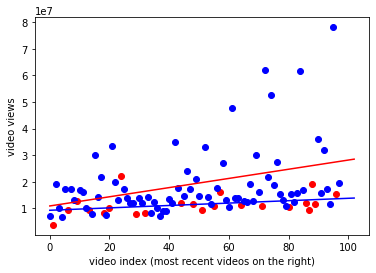

In [14]:
indexes_extended = list(range(len(res)+5))

coef_h = np.polyfit(indexes_hashtag,views_hashtag,1)
poly1d_fn_h = np.poly1d(coef_h) 
est_point_h = poly1d_fn_h(indexes_extended)

coef_nh = np.polyfit(indexes_n_hashtag,views_n_hashtag,1)
poly1d_fn_nh = np.poly1d(coef_nh) 
est_point_nh = poly1d_fn_nh(indexes_extended)

plt.scatter(indexes_hashtag,views_hashtag,color='red')
plt.scatter(indexes_n_hashtag,views_n_hashtag,color='blue')

plt.plot(indexes_extended,est_point_h, color="blue")
plt.plot(indexes_extended,est_point_nh, color="red")

plt.xlabel('video index (most recent videos on the right)')
plt.ylabel('video views')
plt.show()